** 需下載以下特徵模型，放置與本程式碼之子資料夾`model`，也就是說，以下的模型相對於本程式會有以下相對路徑：`model/**`
* 人類偵測模型：[face_landmarker.task](https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/latest/face_landmarker.task)

Ref: https://ai.google.dev/edge/mediapipe/solutions/vision/face_landmarker/python?hl=zh-tw

Screenshot saved as MediaPipe_face_landmark_detection.png


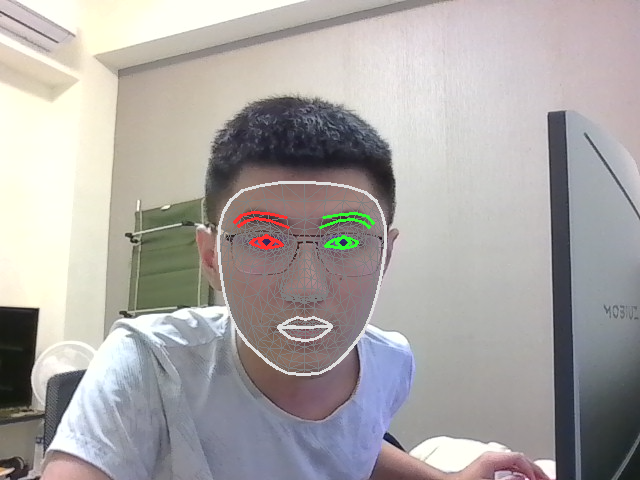

In [ ]:
import cv2
import numpy as np

import mediapipe as mp
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2

from IPython.display import Image, display

# 設定方法
BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode


# 關於人臉偵測的設定
options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path='./models/face_landmarker.task'),
    running_mode=VisionRunningMode.IMAGE)


# 執行人臉偵測
with FaceLandmarker.create_from_options(options) as landmarker:
    cap = cv2.VideoCapture(0) # 讀取攝影鏡頭（webcam）
    while True:
        ret, frame = cap.read()             # 讀取影片的每一幀
        w = frame.shape[1]                  # 畫面寬度
        h = frame.shape[0]                  # 畫面高度
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)
        face_landmarker_result = landmarker.detect(mp_image)

        face_landmarks_list = face_landmarker_result.face_landmarks
        annotated_image = np.copy(frame)

        # 遍歷各個偵測到的臉孔以進行視覺化
        for idx in range(len(face_landmarks_list)):
          face_landmarks = face_landmarks_list[idx]

          # 繪製人臉網格（face landmarks）
          face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
          face_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
          ])

          solutions.drawing_utils.draw_landmarks(
              image=annotated_image,
              landmark_list=face_landmarks_proto,
              connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp.solutions.drawing_styles
              .get_default_face_mesh_tesselation_style())
          solutions.drawing_utils.draw_landmarks(
              image=annotated_image,
              landmark_list=face_landmarks_proto,
              connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp.solutions.drawing_styles
              .get_default_face_mesh_contours_style())
          solutions.drawing_utils.draw_landmarks(
              image=annotated_image,
              landmark_list=face_landmarks_proto,
              connections=mp.solutions.face_mesh.FACEMESH_IRISES,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp.solutions.drawing_styles
                .get_default_face_mesh_iris_connections_style())

        #print(face_landmarker_result)
        if not ret:
            print("Cannot receive frame")         # 如果讀取錯誤，印出錯誤訊息
            break
        cv2.imshow('Live Video', annotated_image)        # 如果讀取成功，顯示該幀的畫面

        key = cv2.waitKey(5) & 0xFF
        if key == ord('q'):    # 按下 q 鍵停止
            break
        elif key == ord('a'):   # 按下 'a' 鍵截圖並儲存
            cv2.imwrite('MediaPipe_face_landmark_detection.png', annotated_image)
            print("Screenshot saved as MediaPipe_face_landmark_detection.png")
            display(Image(filename='MediaPipe_face_landmark_detection.png'))


    cap.release()                           # 所有作業都完成後，釋放資源
    cv2.destroyAllWindows()                      # 結束所有視窗

In [2]:
import os
model_path = r"C:\Users\jk121\Documents\Code\MyLearningResult\圖像識別\作業三\models\face_landmarker.task"
if not os.path.exists(model_path):
    raise FileNotFoundError(f"模型文件不存在: {model_path}")
else:
    print(f"模型文件已找到: {model_path}")


模型文件已找到: C:\Users\jk121\Documents\Code\MyLearningResult\圖像識別\作業三\models\face_landmarker.task


In [2]:
import mediapipe as mp
print("MediaPipe 版本:", mp.__version__)

MediaPipe 版本: 0.10.0
